<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 1 Assignment 2*

In [2]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

from bs4 import BeautifulSoup

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [4]:
from bs4 import BeautifulSoup
import requests

##### Your Code Here #####
PATH = "/Users/ekselan/Documents/GitHub/DS-Unit-4-Machine-Learning/1-NLP/DS-Unit-4-Sprint-1-NLP/module2-vector-representations/data/job_listings.csv"
df = pd.read_csv(PATH)
print(df.shape)
df.head()

(426, 3)


,Unnamed: 0,description,title
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


In [5]:
def clean_description(desc):
    soup = BeautifulSoup(desc)
    return soup.get_text()
df['clean_desc'] = df['description'].apply(clean_description)
print(df.shape)
df.head()

(426, 4)


,Unnamed: 0,description,title,clean_desc
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist,"b""Job Requirements:\nConceptual understanding ..."
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I,"b'Job Description\n\nAs a Data Scientist 1, yo..."
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level,b'As a Data Scientist you will be working on c...
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist,"b'$4,969 - $6,756 a monthContractUnder the gen..."
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist,b'Location: USA \xe2\x80\x93 multiple location...


In [40]:
jobs = df.copy()
def wrangle(x):
    """Function to clean job listings data"""
    rows = []
    # Clean up some of the html remnants
    for row in x["clean_desc"]:
        row = row.replace("\\n"," ")
        row = row.replace("b'", "")
        row = row.replace('b"', '')
        row = row.replace("\\xe2", "")
        row = row.replace("\\x9d", "")
        row = row.replace("\\x80", "")
        row = row.replace("\\xa6", "")
        row = row.replace("\\x9c", "")
        row = row.replace("\\x93", "")
        row = row.replace("\\x99s", "")
        row = row.replace("x99", "")
        row = row.replace("\\", "")
        rows.append(row)
    x["clean_desc"] = rows
    return x
jobs = wrangle(jobs)

In [44]:
print(jobs.shape)
jobs.head()

(426, 4)


,Unnamed: 0,description,title,clean_desc
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist,Job Requirements: Conceptual understanding in ...
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I,"Job Description As a Data Scientist 1, you wi..."
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level,As a Data Scientist you will be working on con...
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist,"$4,969 - $6,756 a monthContractUnder the gener..."
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist,Location: USA multiple locations 2+ years of ...


## 2) Use Spacy to tokenize the listings 

In [55]:
##### Your Code Here #####
nlp = spacy.load("en_core_web_lg")

In [76]:
from spacy.tokenizer import Tokenizer

STOP_WORDS = nlp.Defaults.stop_words.union([" ","data","business","work"])


text = str(jobs["clean_desc"])

doc = nlp(text)

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

# Tokenizer Pipe
tokens = []

""" Make them tokens """
for doc in tokenizer.pipe(jobs['clean_desc'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
jobs['tokens'] = tokens

In [88]:
type(tokens)

list

## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [96]:
##### Your Code Here #####

# List of text documents
data = list(jobs["clean_desc"])

# create the transformer
vect = CountVectorizer(max_df=.95,
                       min_df=2,
                       ngram_range=(1,3),
                       max_features=5000)

# build vocab
vect.fit(data)

# transform data - will produce a matrix
dtm = vect.transform(data)

In [97]:
dtm

<426x5000 sparse matrix of type '<class 'numpy.int64'>'
	with 169423 stored elements in Compressed Sparse Row format>

In [98]:
dtm.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [2, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0]])

In [99]:
# Get Word Counts for each document
dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())
dtm

,000,10,100,11,12,12 months,20,2019,25,3rd,...,your,your career,your own,your skills,your work,your work will,youre,yourself,youve,zf
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
422,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
423,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
424,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [100]:
row = dtm.mean(axis=1)
row

0      0.0296
1      0.1204
2      0.0332
3      0.0506
4      0.0062
        ...  
421    0.1350
422    0.1086
423    0.0912
424    0.1304
425    0.1334
Length: 426, dtype: float64

## 4) Visualize the most common word counts

In [77]:
##### Your Code Here #####

from collections import Counter
import squarify

def count(docs):
    """
    Function which takes a corpus of document and returns a dataframe
    of word counts to analyze.
    """

    word_counts = Counter()
    appears_in = Counter()

    total_docs = len(docs)

    for doc in docs:
        word_counts.update(doc)
        appears_in.update(set(doc))

    temp = zip(word_counts.keys(), word_counts.values())

    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    wc['pct_total'] = wc['count'].apply(lambda x: x / total)

    wc = wc.sort_values(by='rank')
    wc['cul_pct_total'] = wc['pct_total'].cumsum()

    t2 = zip(appears_in.keys(), appears_in.values())
    ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
    wc = ac.merge(wc, on='word')

    wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)

    return wc.sort_values(by='rank')

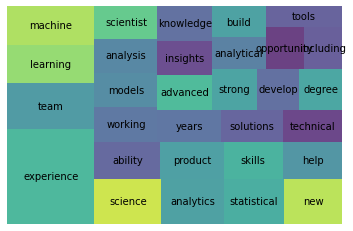

In [78]:
wc = count(jobs['tokens'])

wc_top20 = wc[wc['rank'] <= 30]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [101]:
##### Your Code Here #####

def tokenize(document):
    
    doc = nlp(document)
    
    return [token.lemma_.strip() for token in doc if (token.is_stop != True) and (token.is_punct != True)]

In [112]:
stops = list(STOP_WORDS)
type(stops[0])

str

In [107]:
def get_lemmas(text):

    lemmas = []
    
    doc = nlp(text)
    
    # Something goes here :P
    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

In [114]:
stop_lemmas = []
for word in stops:
    word = get_lemmas(word)
    stop_lemmas.append(word)

In [125]:
stops_and_lemmas = stops + stop_lemmas
type(stops_and_lemmas)

### Got warning when trying to pass STOP_WORDS in the stop_words
### parameter, warning had to do with STOP_WORDS not having same preprocessing
### as tokens. Read into the docs and from what it described I got the impression
### it had something to do with lemmas, so I made a list including both
### the STOP_WORDS themselves and their lemmas. However, I got an error 
### when trying to pass stops_and_lemmas in the stop_words parameter. Error
### was for "unhashable type: list." Not understanding why I got that error ...

list

In [133]:
# Instantiate vectorizer object
### Ended up removing stop_words parameter entirely due to results getting even worse with
### the more stop words I added (tried to accommodate error and warning messages)
tfidf = TfidfVectorizer(ngram_range=(1,3),
                        max_df=.97,
                        min_df=2,
                        tokenizer=tokenize, 
                        max_features=5000)

# Create a vocabulary and get word counts per document
dtm = tfidf.fit_transform(data) # Similiar to fit_predict

# Print word counts

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
dtm.head()

,,,2,3,4,5,ability,addition,additional,advanced,...,year relevant,year relevant work,year work,year work experience,yes,york,york city,zf,|,||
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.078756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.033961,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.063814,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.064607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [134]:
##### Your Code Here #####

from sklearn.neighbors import NearestNeighbors

# Fit on DTM
nn = NearestNeighbors(n_neighbors=5, algorithm='ball_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [146]:
nn.kneighbors([dtm.iloc[115]])

(array([[0.        , 1.19941064, 1.23448532, 1.23640572, 1.24172717]]),
 array([[115, 295, 403, 151,  91]]))

In [145]:
nn.kneighbors([dtm.iloc[295]])

(array([[0.        , 1.19941064, 1.23206341, 1.23486783, 1.23634765]]),
 array([[295, 115, 309, 201, 360]]))

In [144]:
data[295][:200]

"What We Are Doing: ForeScout is at the forefront of IoT Security. As the world becomes more and more connected so does the need for ForeScout's products. We are looking for individuals that want to be"

In [143]:
data[115][:200]

'Company Overview At Proofpoint, we have a passion for protecting people, data, and brands from today advanced threats and compliance risks. We hire the best people in the business to: Build and enhanc'

In [147]:
abw_listing = ["""
Seeking beginner data scientist for role in sports analytics. Skills include python,
scikit learn, pandas, seaborn, matplotlib and machine learning algorithms such as 
kmeans, logistic regression, etc. Should have experience working in teams, explaining
technical information to non-technical individuals, building and managing databases,
and creating ETL pipelines. Skills should also include SQL, noSQL, Tableau and Excel.
"""]

In [149]:
# Query for abw_listing
new = tfidf.transform(abw_listing)

nn.kneighbors(new.todense())

(array([[1.23020041, 1.25860562, 1.28462436, 1.29001297, 1.29497634]]),
 array([[403, 199, 215, 249, 180]]))

In [156]:
# Inspect Most relevant result
data[403]

'About Us Interested in working for a human-centered technology company that prides itself on using modern tools and technologies? Want to be surrounded by intensely curious and innovative thinkers?  Seeking to solve complex technical challenges by building products that work for people, meet and exceed the needs of businesses, and work elegantly and efficiently?  Modeling ourselves after the 1904 World Fair, which brought innovation to the region, 1904labs is seeking top technical talent in St. Louis to bring innovation and creativity to our clients.  Our clients consist of Fortune 500 and Global 2000 companies headquartered here in St. Louis. We partner with them on complex projects that range from reimagining and refactoring their existing applications, to helping to envision and build new applications or data streams to operationalize their existing data. Working in a team-based labs model, using our own flavor of #HCDAgile, we strive to work at the cutting edge of technology capab

In [ ]:
### Not very close but not all that far off either haha

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 